In [121]:
import os

import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from pathlib import Path
from scipy.spatial.distance import jensenshannon
from sklearn_extra.cluster import KMedoids

In [30]:
data_path = Path(os.getenv("DATA_PATH"))
out_path = data_path / "generated"

In [303]:
level = "fine"
df_points = gpd.read_file(out_path / level / "points" / "remove_unused" / "19.1.01.gpkg")
df_poly = gpd.read_file(out_path / level / "polygons" / "labeled" / "19.1.01.gpkg")

In [304]:
df_merged = (
    df_points
    .merge(df_poly[["label", "medoid"]], on="label")
    .assign(category=lambda df: df["codigo_act"].astype(str).str[:2].astype(int))
    .drop(columns=["label", "codigo_act"])
    .groupby(["medoid", "category"])
    ["geometry"]
    .count()
    .reset_index()
    .query("~(category in [46, 72, 81])")
    .pivot_table(index="medoid", columns="category", values="geometry", fill_value=0)
)
df_merged = df_merged.divide(df_merged.sum(axis=1), axis=0)

In [285]:
31 - Prendas
32 - Papel
33 - Metales

NameError: name 'Prendas' is not defined

In [323]:
for idx, row in df_merged.iterrows():
    print(idx, row.sort_values(ascending=False).head(4).index.sort_values().tolist())

0 [43, 52, 61, 62]
1 [32, 33, 43, 54]
2 [31, 43, 61, 62]
3 [31, 43, 52, 62]
4 [33, 43, 61, 62]
5 [43, 52, 54, 62]


<Axes: xlabel='category'>

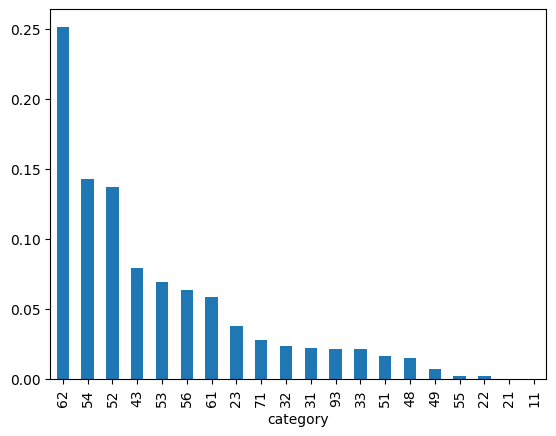

In [330]:
df_merged.loc[5].sort_values(ascending=False).plot.bar()

- 0: 31, 33, 43, 61

<Axes: >

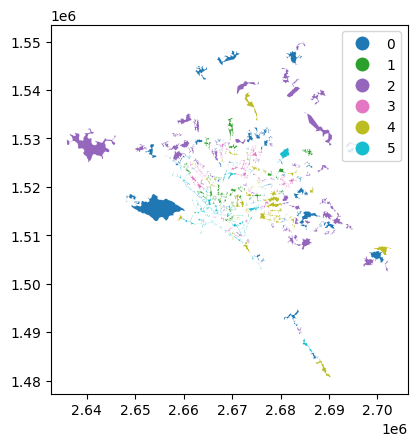

In [313]:
df_poly.plot(column="medoid", categorical=True, legend=True)